In [1]:
!pip install neuralprophet

  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730973 sha256=2d1ddbbf35d1ee63256d92e7db45862b3079c2fc92e404f45ec277d516e4d05a
  Stored in directory: c:\users\dinor\appdata\local\pip\cache\wheels\a0\8b\b2\810ae5a6f970c8be4725353400d643c90de1c0f023a9884ee7
Successfully built pymeeus
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
melb = df[df['Location'] == 'Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-8-1489c6e35a8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date'] = pd.to_datetime(melb['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [9]:
melb.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

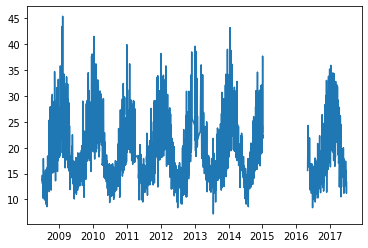

In [10]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (2651,)

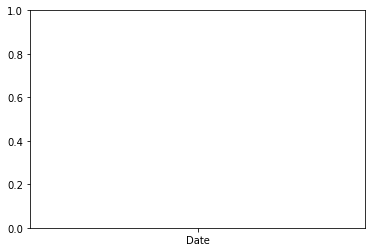

In [22]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<= 2015]
plt.plot(['Date'], melb['Temp3pm'])
plt.show()

In [23]:
melb.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No,2008
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes,2008
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No,2008
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No,2008
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No,2008


In [24]:
data = melb[['Date', 'Temp3pm']]
data.dropna(inplace= True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-24-da955f377d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace= True)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


In [25]:
data

,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6
...,...,...
69486,2015-01-01,23.7
69487,2015-01-02,37.7
69488,2015-01-03,37.4
69489,2015-01-04,21.8


# Train model

In [26]:
m = NeuralProphet()
m.fit(data, freq = 'D', epochs = 1000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/268 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.37E-02, min: 1.30E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.48E-01
Epoch[1000/1000]: 100%|████████| 1000/1000 [01:39<00:00, 10.07it/s, SmoothL1Loss=0.0144, MAE=3.02, MSE=15.8, RegLoss=0]


,SmoothL1Loss,MAE,MSE,RegLoss
0,0.750213,27.062183,1201.401922,0.0
1,0.281588,14.520987,344.277541,0.0
2,0.090659,8.174778,99.665470,0.0
3,0.052346,6.241338,57.333420,0.0
4,0.036501,5.162705,39.972595,0.0
...,...,...,...,...
995,0.014448,3.019221,15.822807,0.0
996,0.014445,3.017941,15.818695,0.0
997,0.014442,3.017184,15.815804,0.0
998,0.014441,3.017239,15.814596,0.0


# Forecast Away

In [27]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.208607,NaN,20.694798,5.288139,0.225673
1,2015-01-07,None,26.126999,NaN,20.697968,5.437204,-0.008171
2,2015-01-08,None,26.420704,NaN,20.701138,5.583176,0.136393
3,2015-01-09,None,26.505367,NaN,20.704304,5.725266,0.075796
4,2015-01-10,None,26.541763,NaN,20.707478,5.862714,-0.028428


In [28]:
future

,ds,y,t,y_scaled
0,2015-01-06,None,1.000420,None
1,2015-01-07,None,1.000841,None
2,2015-01-08,None,1.001261,None
3,2015-01-09,None,1.001681,None
4,2015-01-10,None,1.002102,None
...,...,...,...,...
895,2017-06-19,None,1.376629,None
896,2017-06-20,None,1.377049,None
897,2017-06-21,None,1.377470,None
898,2017-06-22,None,1.377890,None


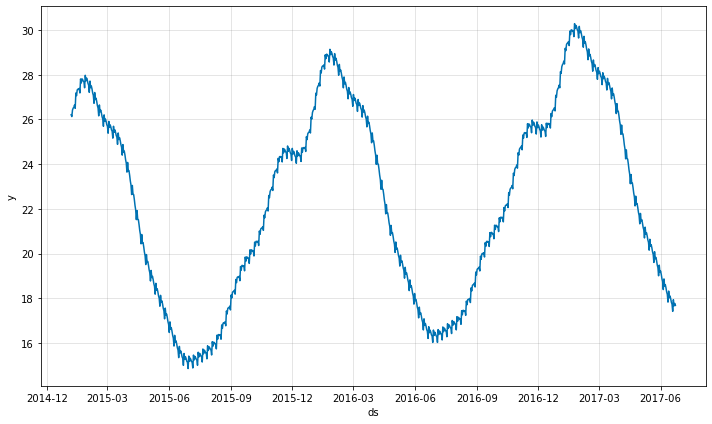

In [29]:
plot1 = m.plot(forecast)

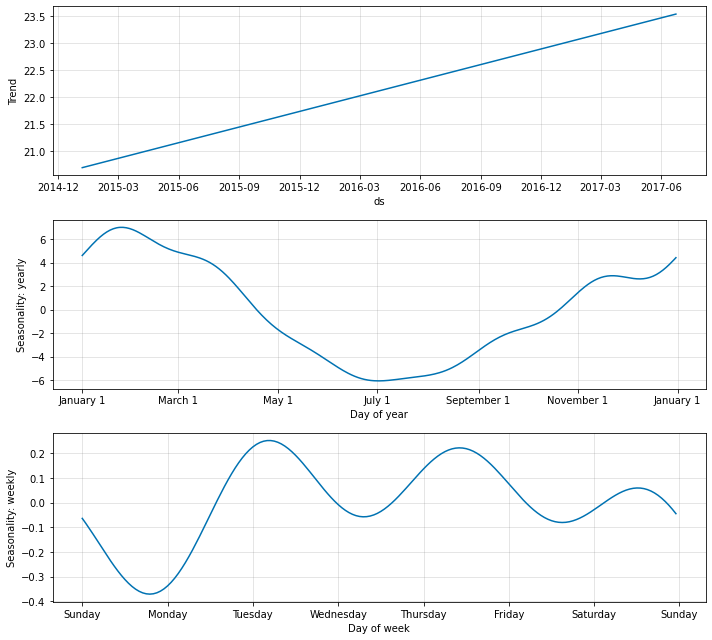

In [30]:
plot2 = m.plot_components(forecast)

# Save Model

In [31]:
with open('forecast_model.pkl', 'wb') as f:
    pickle.dump(m, f)

In [32]:
m

In [33]:
future = m.make_future_dataframe(data, periods=12000)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.208607,NaN,20.694798,5.288139,0.225673
1,2015-01-07,None,26.126999,NaN,20.697968,5.437204,-0.008171
2,2015-01-08,None,26.420704,NaN,20.701138,5.583176,0.136393
3,2015-01-09,None,26.505367,NaN,20.704304,5.725266,0.075796
4,2015-01-10,None,26.541763,NaN,20.707478,5.862714,-0.028428


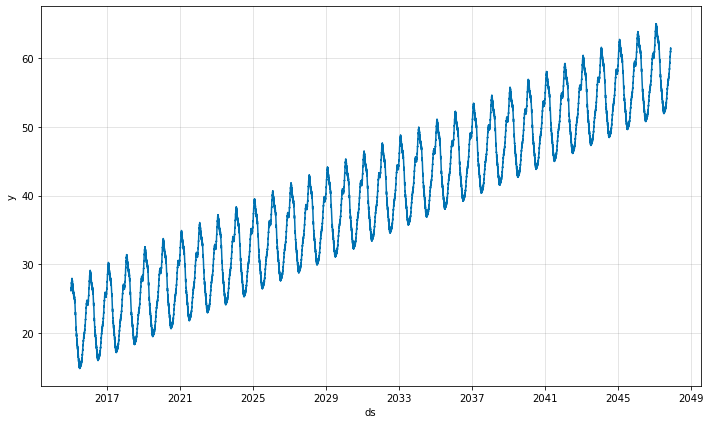

In [34]:
plot3 = m.plot(forecast)

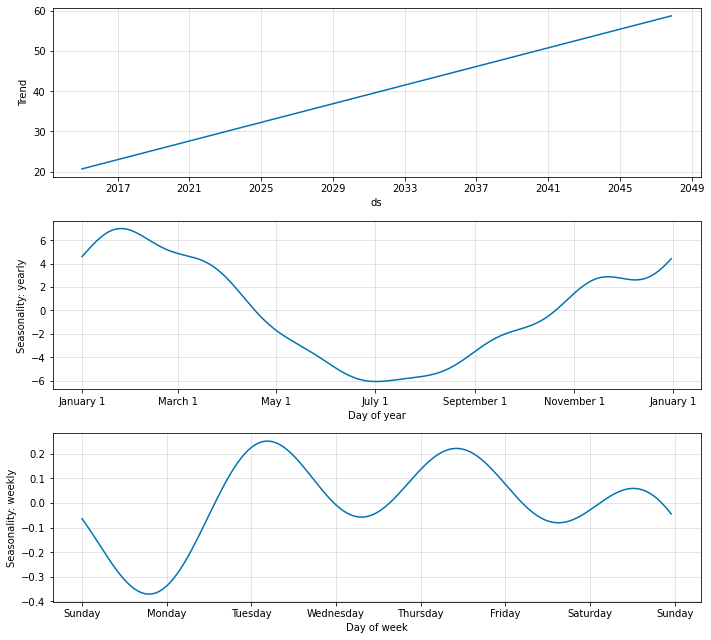

In [35]:
plot4 = m.plot_components(forecast)

In [36]:
with open('forecast_model2.pkl', 'wb') as f:
    pickle.dump(m, f)

In [37]:
m